# MA206 Lesson 13: Two Proportion Inference

In [10]:
install.packages('tidyverse')
install.packages('janitor')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(tidyverse)
library(janitor)
gallen <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/gallen.csv")
health <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/nhanes.csv")

New names:
• `` -> `...1`
Rows: 14451 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): pitch_type, pitch_name, events, stand, in_out
dbl  (10): ...1, release_speed, batter, zone, balls, strikes, game_year, pla...
date  (1): game_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 10000 Columns: 76
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (31): SurveyYr, Gender, AgeDecade, Race1, Race3, Education, MaritalStatu...
dbl (45): ID, Age, AgeMonths, HHIncomeMid, Poverty, HomeRooms, Weight, Lengt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# One Proportion Recap
We've been doing a one-proportion Z-test until now, which works through normal approximation (ie, we have enough data for the null distribution to simulate a normal distribution). Within the proportion $\dfrac{X}{n}$, only the numerator $X$ is random, since the sample size is known, (I know I want to sample 30 cadets but I do not know what they're answer to my yes or no question will be). We've discussed briefly that this is called a **Binomial Random Variable**, which counts the *successes* in *n* trials, with each trial having a probability of *p* to succeed. We'd say $X \sim Bin(n,p) $, which has mean $np$ and variance $np(1-p)$. We can find the exact probabilities however they are computationally expensive compared to approximating the proportion with a normal distribution with mean $np$ and variance $np(1-p)$. More concretely,

$$
\begin{align*}
  \text{Parameter} \ &= \frac{X}{n} \\
  \mathbb{E}\Big[\frac{X}{n}\Big] &= \frac{1}{n} \mathbb{E}[X] = \frac{1}{n}np = p \\
  Var\left( \frac{X}{n} \right) &= \frac{1}{n^2}Var(X) = \frac{1}{n^2}np(1-p) = \frac{p(1-p)}{n}
\end{align*}
$$

The above should hopefully look familiar if you were to replace p with $\pi$, the mean of our null distribution is $\pi$ in the second line, and the variance in the third line is where our standard deviation of the null distribution comes from (just take the square root). We use these two quantities to put our observed statistic (proportion from our data) in terms of the standard normal distribution to get a p-value.

# Now there are two of them.

We are going to do the same exact process above except now our parameter in question will be the difference between two proportions. This parameter is interesting to us because many times we need to determine if two categories differ from one another in the similar circumstances (think control and test groups in a disease study). This would look like:

$$
\begin{align*}
  \text{Parameter} \ &= \frac{X}{n_x} - \frac{Y}{n_y} = \pi_x - \pi_y = \pi \\
  \text{ Keep in mind }&\text{this is not $\hat{p}$, the observed statistic,} \\ \text{ but the theoretical probability of a success}& \text{ from our Binomial random variables X and Y. } \\
  \mathbb{E}\Big[\frac{X}{n_x} - \frac{Y}{n_y}\Big] &= \frac{1}{n_x} \mathbb{E}[X] - \frac{1}{n_y} \mathbb{E}[Y] = \frac{1}{nx}n_xp_x - \frac{1}{ny}n_yp_x= p_x - p_y \\
  Var\left( \frac{X}{n_x} - \frac{Y}{n_y} \right) &= \frac{1}{n_x^2}Var(X) + \frac{1}{n_y^2}Var(Y)  \\
  &= \frac{1}{n_x^2}n_xp_x(1-p_x) + \frac{1}{n_y^2}n_yp_y(1-p_y) \\
  &= \frac{p_x(1-p_x)}{n_x} + \frac{p_y(1-p_y)}{n_y} \\
  \text{Under the null hypothesis, there is no}&\text{ difference between the proportions,} \\ \text{ so we can factor out the}&\text{ proportion expressions to conclude:} \\
  &= p(1-p)\left( \frac{1}{n_x} + \frac{1}{n_y} \right) \\
  Std. Dev. \left( \frac{X}{n_x} - \frac{Y}{n_y} \right) &= \sqrt{ p(1-p)\left( \frac{1}{n_x} + \frac{1}{n_y} \right) }
\end{align*}
$$

That is all the theory we will need in order to conduct our two proportion hypothesis test! Everything else is essentially the same as one-proportion in terms of standardizing our observed statistic into a Z-statistic(or Z-score), finding a p-value, and making a conclusion at some level of significance $\alpha$.

When constructing a confidence interval, we do not use the assumption that the proportions will be the same between the two groups, and have to account for both observed proportions in our data when calculating the Standard Error (SE).

$$
\begin{align*}
SE &= \sqrt{\frac{\hat{p}_x(1-\hat{p}_x)}{n_x} + \frac{\hat{p}_y(1-\hat{p}_y)}{n_y}} \\
M &= \Phi^{-1}(1-\alpha/2) \\
CI &= (\hat{p}_x - \hat{p}_y) \pm M * SE
\end{align*}
$$

In [12]:
gallen %>% head

...1,game_date,pitch_type,pitch_name,release_speed,batter,events,zone,stand,balls,strikes,game_year,plate_x,plate_z,pitch_number,in_out
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,2024-09-25,KC,Knuckle Curve,82.9,656305,strikeout,14,R,2,2,2024,0.47,0.96,5,outside
1,2024-09-25,KC,Knuckle Curve,82.7,656305,NA,9,R,2,1,2024,0.55,1.68,4,outside
2,2024-09-25,KC,Knuckle Curve,82.7,656305,NA,11,R,1,1,2024,-1.88,3.08,3,inside
3,2024-09-25,FF,4-Seam Fastball,94.8,656305,NA,13,R,1,0,2024,-0.85,2.38,2,inside
4,2024-09-25,KC,Knuckle Curve,82.8,656305,NA,11,R,0,0,2024,-1.69,3.56,1,inside
5,2024-09-25,FF,4-Seam Fastball,94.6,664774,field_out,6,L,3,1,2024,0.39,2.19,5,inside


## Does Zac throw his fastball inside more to left-handed hitters than right-handed hitters?

### Parameter of interest.

We start with the two separate proportions we are interested in, ie: $\pi_1$ is the proportion of four-seam fastball pitches thrown to lefties that are inside. $\pi_2$ is the proportion of four-seam fastball pitches thrown to righties that are inside.

Our research question is about the difference between these two proportions. If Zac threw the same to both right and left-handed batters, we would anticipate the difference in these proportions to be not significantly different from zero (our null hypothesis). Our alternative hypothesis would then be that there is a significant difference (alternative hypothesis).

1.  $\pi=\pi_R - \pi_L$.

$H_0: $ Zac Gallen pitches the same proportion of inside fastballs to right-handed and left-handed hitters. ($\pi = 0$)

$H_A: $ Zac Gallen pitches a different proportion of inside fastballs to right-handed hitters than left-handed. ($\pi \neq 0$)

2.  Find the observed statistics: (filter the data to only select fastballs then create a table of the inside vs outside pitches and the batter's stance)

In [13]:
gallen %>% filter(pitch_type == 'FF') %>% tabyl(in_out, stand) %>% adorn_totals

,in_out,L,R
,<chr>,<dbl>,<dbl>
1,inside,1259,1779
2,outside,1796,2084
3,Total,3055,3863


It looks like Zac threw more pitches to right-handed batters, more common since around 70% of the league bats right-handed. To visualize these conditional proportions, lets create a mosaic plot.

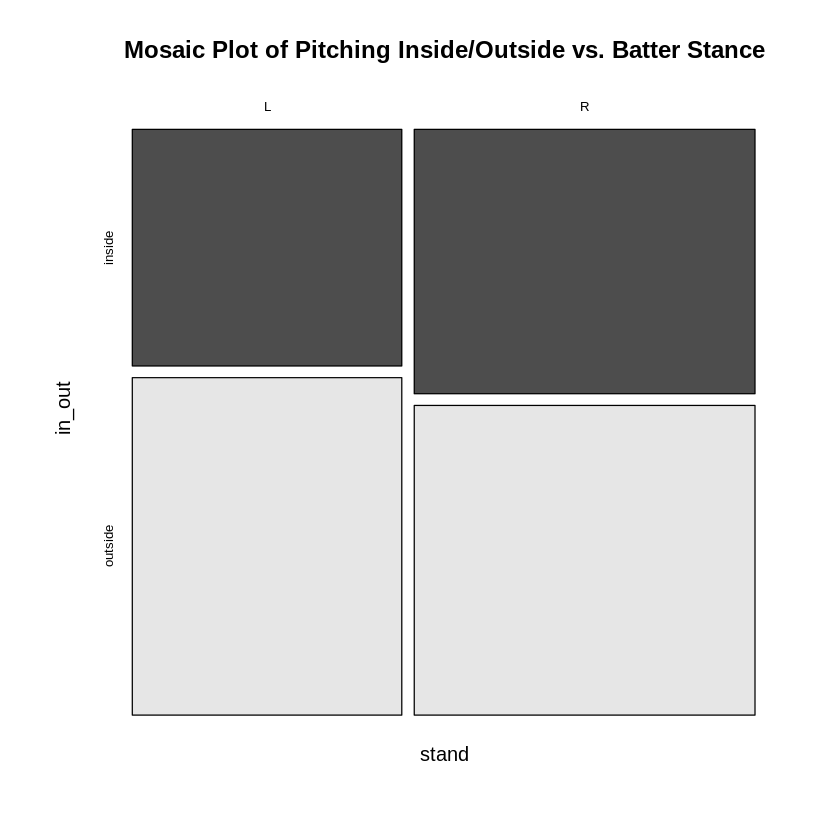

In [14]:
gallen %>% filter(pitch_type == 'FF') %>% select(stand, in_out) %>% table() %>%
  plot(color=TRUE, main='Mosaic Plot of Pitching Inside/Outside vs. Batter Stance')

3.  Finding Z-Statistic (copied from course guide)

In [15]:
null = 0           # Enter the value of your Null Hypothesis Parameter
successes_1 = 1259    # number of successes in group 1
successes_2 = 1779    # number of successes in group 2
n_1 = 3055   # sample size of group 1
n_2 = 3863   # sample size of group 2
n = n_1 + n_2     # total sample size
phat_1 = successes_1/n_1
phat_2 = successes_2/n_2
phat_t = (successes_1 + successes_2)/(n)
diff = phat_1-phat_2 # ensure this matches your null hypothesis order
sd = sqrt(phat_t*(1-phat_t)*(1/n_1 + 1/n_2))
z = (diff-null)/sd  ; z # standardized statistic

[1] -4.029008

4.  Finding p-value and state a conclusion using a 5% significance level.

In [16]:
2*(1-pnorm(abs(z)))

[1] 5.601283e-05

With a p-value of 5.6e-05, at a significance level of 0.05 there is very strong evidence to reject the null hypothesis that Zac Gallen throws the same proportion of inside fastballs to right-handed and left-handed batters.

## Lets make a 95% confidence interval to go along with our conclusion.

In [17]:
siglevel = 0.05             # Enter your significance level (alpha)
multiplier = qnorm(1-siglevel/2)
se = sqrt(phat_1*(1-phat_1)/n_1+phat_2*(1-phat_2)/n_2) # Standard Error
CI = c(diff-multiplier*se, diff+multiplier*se)  ; CI # Confidence Interval

[1] -0.07189994 -0.02492329

Note since zero is not included in our confidence interval **and we conducted a two-sided test** this also supports our decision to reject the null hypothesis.

Just out of curiousity lets look at all the fastballs Zac pitched, color-coded by zone of the strike zone.

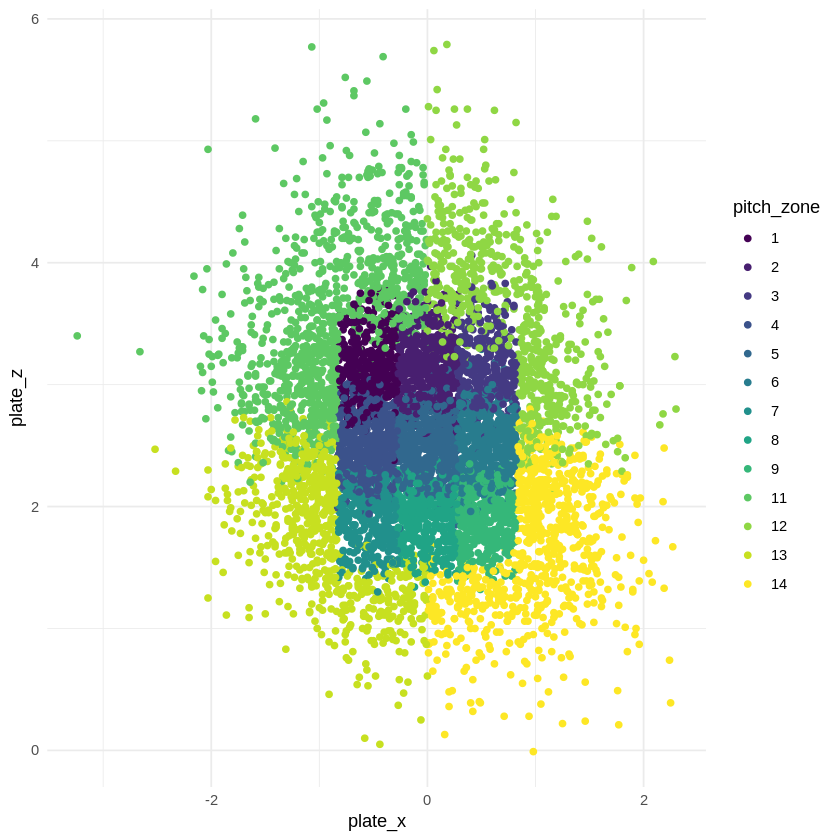

In [65]:
gallen %>% filter(pitch_type == 'FF') %>% mutate(pitch_zone = as.factor(zone)) %>%
  ggplot(aes(x=plate_x, y=plate_z, color=pitch_zone)) + geom_point() + scale_color_viridis_d() + theme_minimal()

## High Pressure Pitching

Which pitch does Zac rely on the most and does batter stance matter? We could interpret this in a situation when he is at risk for walking the batter (ie in counts with 3 balls).
Below is a bar plot of pitches thrown when the count has 3 balls.

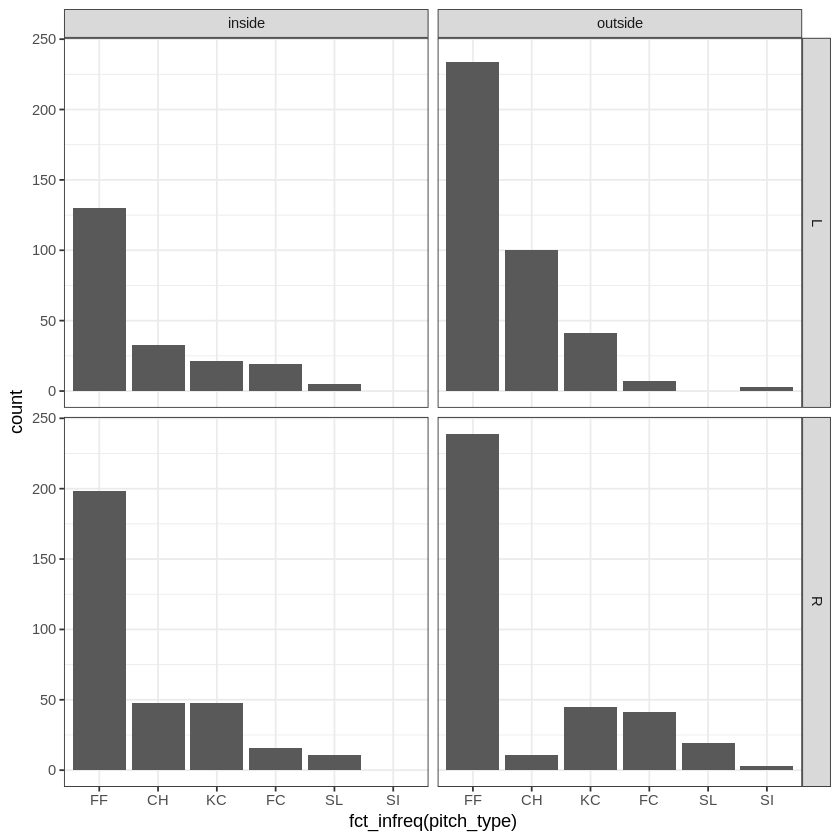

In [45]:
gallen %>% filter(balls == 3) %>% ggplot(aes(fct_infreq(pitch_type))) + geom_bar() +
  facet_grid(stand ~ in_out) + theme_bw()

To look at each pitch individually, we can add an aditional filter for pitch-type. (Try visualizing different pitches, if you're curious about what pitches Zac throws, try "gallen %>% select(pitch_type, pitch_name) %>% unique" in a new code chunk).

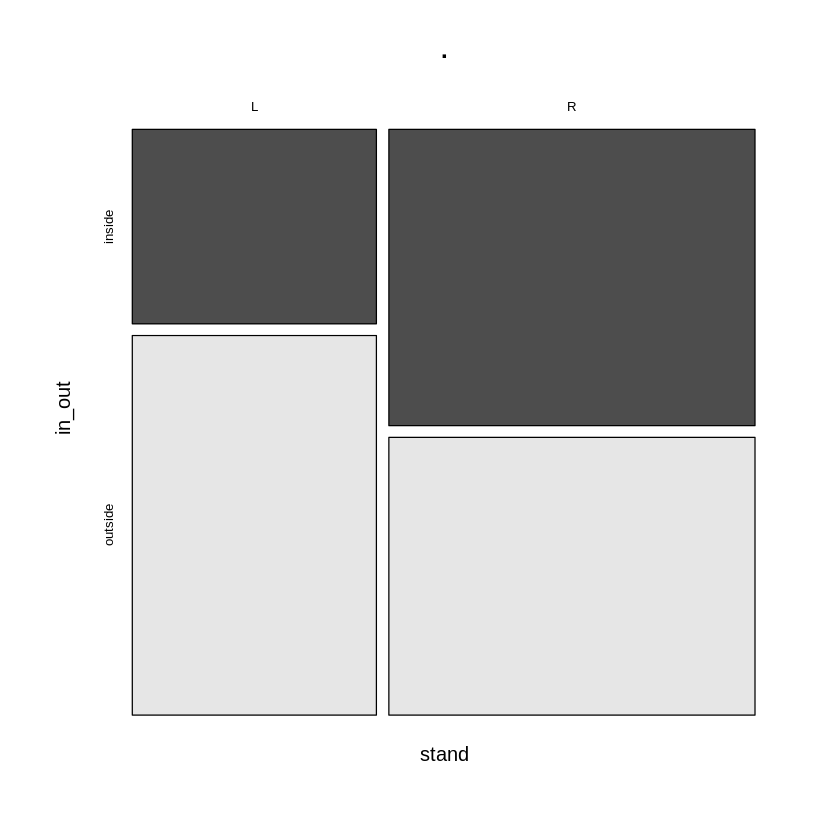

In [36]:
gallen %>% filter(balls == 3 & pitch_type == 'KC') %>% select(stand, in_out) %>% table() %>% plot(color=TRUE)

Zac's favorite pitch is the knuckle-curve, lets test to see if there is a difference in how Zac pitches to left vs. right-handed hitters with his knuckle-curve in 3-ball count situations.

In [40]:
gallen %>% filter(balls == 3 & pitch_type == 'KC') %>% tabyl(in_out, stand) %>% adorn_totals

,in_out,L,R
,<chr>,<dbl>,<dbl>
1,inside,21,48
2,outside,41,45
3,Total,62,93


In [41]:
null = 0           # Enter the value of your Null Hypothesis Parameter
successes_1 = 21    # number of successes in group 1
successes_2 = 48    # number of successes in group 2
n_1 = 62   # sample size of group 1
n_2 = 93   # sample size of group 2
n = n_1 + n_2     # total sample size
phat_1 = successes_1/n_1
phat_2 = successes_2/n_2
phat_t = (successes_1 + successes_2)/(n)
diff = phat_1-phat_2 # ensure this matches your null hypothesis order
sd = sqrt(phat_t*(1-phat_t)*(1/n_1 + 1/n_2))
z = (diff-null)/sd  ; z # standardized statistic
2*(1-pnorm(abs(z)))
siglevel = 0.05             # Enter your significance level (alpha)
multiplier = qnorm(1-siglevel/2)
se = sqrt(phat_1*(1-phat_1)/n_1+phat_2*(1-phat_2)/n_2) # Standard Error
CI = c(diff-multiplier*se, diff+multiplier*se)  ; CI # Confidence Interval

[1] -2.177361

[1] 0.02945366

[1] -0.3329625 -0.0218762

With a p-value of 0.0295 we reject the null hypothesis at a 5% significance level, meaning Zac likely pitches differently to right vs. left handed batters with his knuckle-curve when there are 3-ball counts.

## Can we tell if Gallen misses outside or inside more?

Discerning what a pitcher was trying to do from data is a very hard task. Assuming Gallen never intentionally walks someone (nowadays managers just can put a runner on instead of going through 4 pitches), we can look at all pitches where the outcome was a walk, (meaning Gallen missed his spot or did not get a close call), and see if the pitch was inside or outside.

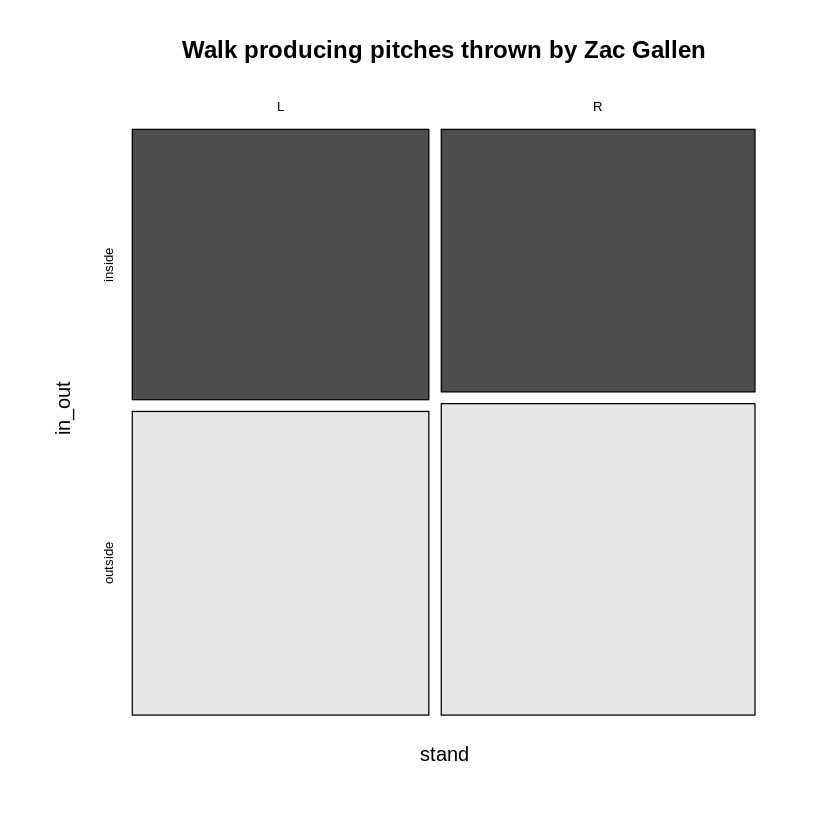

In [47]:
gallen %>% filter(events == 'walk') %>% select(stand, in_out) %>% table() %>%
  plot(main='Walk producing pitches thrown by Zac Gallen', color=TRUE)

They look really close! Lets do a two-proportion z-test to see if there is any significance difference between the two.

In [48]:
gallen %>% filter(events == 'walk') %>% tabyl(in_out, stand) %>% adorn_totals()

,in_out,L,R
,<chr>,<dbl>,<dbl>
1,inside,73,75
2,outside,82,89
3,Total,155,164


In [49]:
null = 0           # Enter the value of your Null Hypothesis Parameter
successes_1 = 73    # number of successes in group 1
successes_2 = 75    # number of successes in group 2
n_1 = 155   # sample size of group 1
n_2 = 164   # sample size of group 2
n = n_1 + n_2     # total sample size
phat_1 = successes_1/n_1
phat_2 = successes_2/n_2
phat_t = (successes_1 + successes_2)/(n)
diff = phat_1-phat_2 # ensure this matches your null hypothesis order
sd = sqrt(phat_t*(1-phat_t)*(1/n_1 + 1/n_2))
z = (diff-null)/sd  ; z # standardized statistic
2*(1-pnorm(abs(z)))
siglevel = 0.05             # Enter your significance level (alpha)
multiplier = qnorm(1-siglevel/2)
se = sqrt(phat_1*(1-phat_1)/n_1+phat_2*(1-phat_2)/n_2) # Standard Error
CI = c(diff-multiplier*se, diff+multiplier*se)  ; CI # Confidence Interval

[1] 0.2443476

[1] 0.8069616

[1] -0.09584006  0.12314140

Our p-value is 0.8, we fail to reject the null hypothesis and also see that the confidence interval includes zero.

# Health Data

Among other lifestyle hazards, hard drug usage poses serious health consequences. Using NHANES data from 10000 randomly sampled Americans, we can conduct inference generalized to the country.

Lets specifically look at blood pressure and drug usage.

In [76]:
health$hypertensive <- ifelse(health$BPSysAve >= 140 | health$BPDiaAve >= 90, "Yes", "No")

# Filter complete cases
health_spec <- na.omit(health[, c("Gender", "hypertensive", "HardDrugs", "AgeDecade", "Smoke100n")])

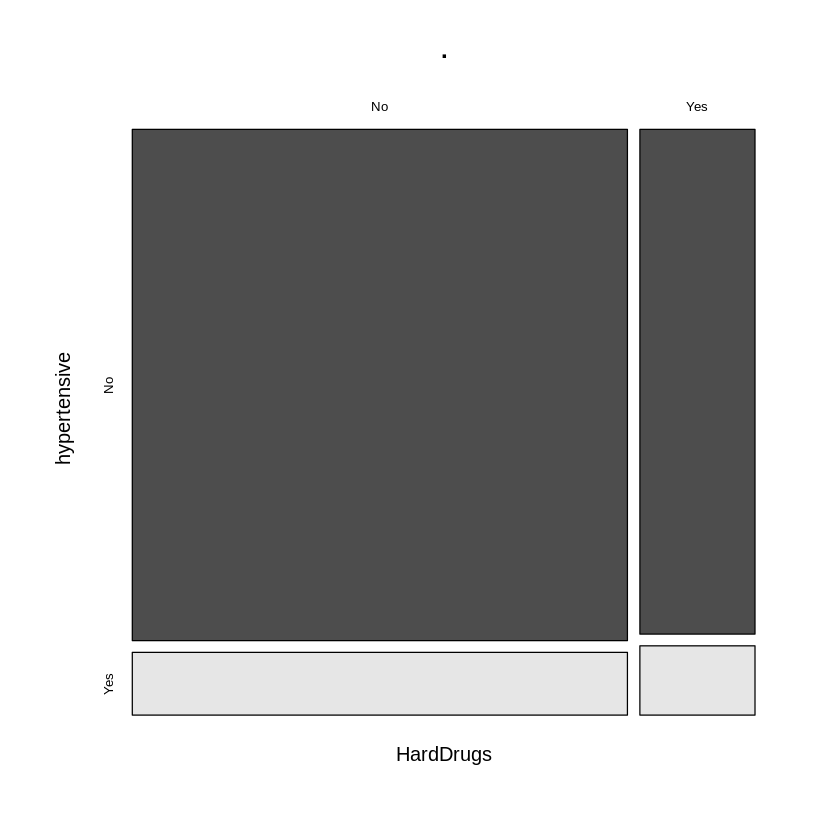

In [77]:
health_spec %>% select(HardDrugs, hypertensive) %>% table() %>% plot(color=TRUE)

It does not appear that significantly different. Lets run the two-proportion test to confirm.

In [74]:
health_spec %>% tabyl(hypertensive, HardDrugs) %>% adorn_totals

,hypertensive,No,Yes
,<chr>,<dbl>,<dbl>
1,No,3934,903
2,Yes,483,124
3,Total,4417,1027


In [75]:
null = 0           # Enter the value of your Null Hypothesis Parameter
successes_1 = 483    # number of successes in group 1
successes_2 = 124    # number of successes in group 2
n_1 = 4417   # sample size of group 1
n_2 = 1027   # sample size of group 2
n = n_1 + n_2     # total sample size
phat_1 = successes_1/n_1
phat_2 = successes_2/n_2
phat_t = (successes_1 + successes_2)/(n)
diff = phat_1-phat_2 # ensure this matches your null hypothesis order
sd = sqrt(phat_t*(1-phat_t)*(1/n_1 + 1/n_2))
z = (diff-null)/sd  ; z # standardized statistic
2*(1-pnorm(abs(z)))
siglevel = 0.05             # Enter your significance level (alpha)
multiplier = qnorm(1-siglevel/2)
se = sqrt(phat_1*(1-phat_1)/n_1+phat_2*(1-phat_2)/n_2) # Standard Error
CI = c(diff-multiplier*se, diff+multiplier*se)  ; CI # Confidence Interval

[1] -1.044578

[1] 0.2962179

[1] -0.03333966  0.01056010

Closer than what the mosaic plot portrayed, however not significant.

## What about smoking and education level?

In [78]:
health %>% filter(!is.na(Education) & !is.na(Smoke100n)) %>% tabyl(Smoke100n, Education) %>% adorn_totals()


,Smoke100n,8th Grade,9 - 11th Grade,College Grad,High School,Some College
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Non-Smoker,234,362,1414,762,1239
2,Smoker,217,526,684,755,1028
3,Total,451,888,2098,1517,2267


Just looking at college and high school grads:

In [79]:
null = 0           # Enter the value of your Null Hypothesis Parameter
successes_1 = 684       # number of successes in group 1
successes_2 = 755    # number of successes in group 2
n_1 = 2098   # sample size of group 1
n_2 = 1517   # sample size of group 2
n = n_1 + n_2     # total sample size
phat_1 = successes_1/n_1
phat_2 = successes_2/n_2
phat_t = (successes_1 + successes_2)/(n)
diff = phat_1-phat_2 # ensure this matches your null hypothesis order
sd = sqrt(phat_t*(1-phat_t)*(1/n_1 + 1/n_2))
z = (diff-null)/sd  ; z # standardized statistic
2*(1-pnorm(abs(z)))
siglevel = 0.05             # Enter your significance level (alpha)
multiplier = qnorm(1-siglevel/2)
se = sqrt(phat_1*(1-phat_1)/n_1+phat_2*(1-phat_2)/n_2) # Standard Error
CI = c(diff-multiplier*se, diff+multiplier*se)  ; CI # Confidence Interval

[1] -10.40589

[1] 0

[1] -0.2038455 -0.1394906

A significant difference! So we all agree education levels can determine whether someone smokes?